<a href="https://colab.research.google.com/github/ShivamGuptaaaa/CODSOFT/blob/main/Task_1_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 1: TITANIC SURVIVAL PREDICTION**

   ## Name: Shivam Gupta

   ## Batch: January

   ## Domain: Data Science

   ## Project Aim: To build a model that predicts whether a passenger on the Titanic survived or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
titanic = pd.read_csv('/Titanic-Dataset.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#**Analysing Data**

<ipython-input-36-f9027c882c9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data= titanic,palette=palette)


<Axes: xlabel='Survived', ylabel='count'>

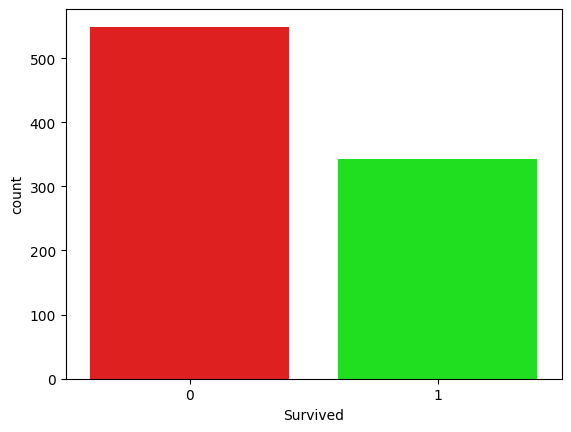

In [ ]:
# Let check how many passenger got survived and not survive
palette= ['#FF0000','#00FF00']
sns.countplot(x = 'Survived', data= titanic,palette=palette)

*Analysis: 0 represent not survived* **(Red)** *and 1 represent survived* **(Green)**

*In the above chart we clearly see that more than 500 passenger not survived and nearly 300 passenger survived*

<Axes: xlabel='Survived', ylabel='count'>

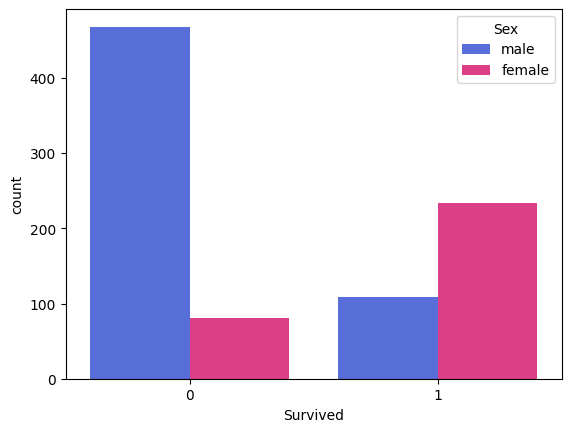

In [ ]:
# Let check how many male and female not survived and survived
palette= ['#4361EE','#F72585']
sns.countplot(x='Survived', hue= 'Sex', data= titanic, palette= palette)



*As compare to male **(nearly 100)** female **(more than 200)** survive count double.*

\


<Axes: xlabel='Survived', ylabel='count'>

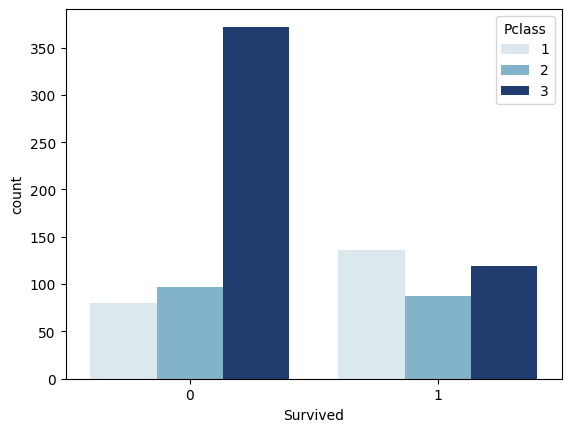

In [ ]:
# Let's check how many class 1, class 2, class 3 passenger survived
palette= ['#D7EAF3','#77B5D7','#14397D']
sns.countplot(x='Survived', hue= 'Pclass', data= titanic, palette= palette)

*Anaysis: In the above chart we clearly see passenger class 3 who did not survived*

*Class 1 passenger are more likely to survived*

<Axes: ylabel='Frequency'>

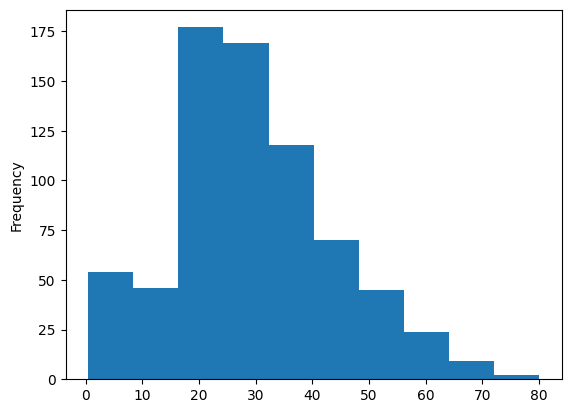

In [ ]:
# Check the age of the passenger who is traveling
titanic['Age'].plot.hist()

*As we see more passenger who is traveling age between 20 to 40 and very few passenger age group 60 to 80*

<ipython-input-40-a92c018a97b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data= titanic, palette= 'Paired')


<Axes: xlabel='SibSp', ylabel='count'>

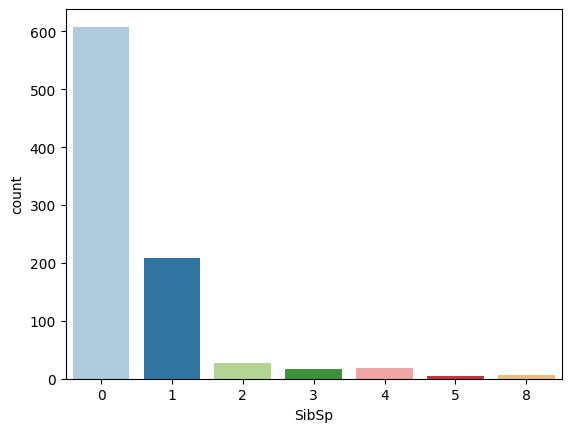

In [ ]:
# Let see who is traveling with Siblings
sns.countplot(x='SibSp', data= titanic, palette= 'Paired')

*As we see most of the passenger do not have their siblings.*

#**Data Wrangling**
Means cleaning the data

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

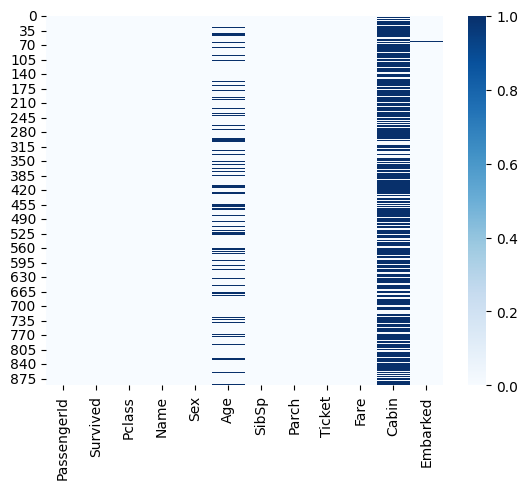

In [ ]:
sns.heatmap(titanic.isnull(), cmap="Blues")

*As we see in the heatmap Age, Cabin and Embarked has a null value
blue colour showing the null value more in Cabin*

<Axes: xlabel='Pclass', ylabel='Age'>

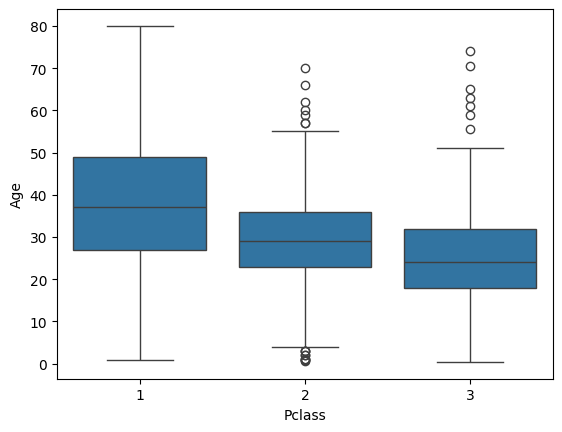

In [ ]:
# Let's see the age group of the passenger traveling the Class 1,2,3
sns.boxplot(x='Pclass', y="Age", data=titanic)

*As we see in the boxplot age between 30 to 50 are more in Class 1, in Class 2 and 3 their is a outliers  *

In [ ]:
# Again checking the Titanic Dataset for cleaning
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Now we are dropping the Cabin column because we don't need
titanic.drop("Cabin", axis=1, inplace = True)

In [ ]:
titanic.head(10) # Dropped Cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
titanic.dropna(inplace=True)

<Axes: >

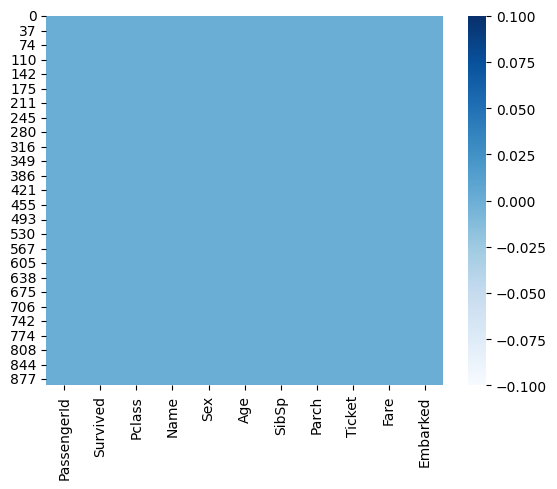

In [ ]:
sns.heatmap(titanic.isnull(), cmap="Blues")

In [ ]:
# Let again check the is their any Null value in the dataset
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#**Now we will convert some column(string) into categorical data to apply logestic regression**

In [ ]:
pd.get_dummies(titanic['Sex'].head())

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
# Now we will drop first column because we will clearly determine with the second column
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


* 1 represent the male and 0 represent the female*

In [ ]:
# Embarked implies where the traveler mounted from
embark = pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# C stands for Cherbourg
# Q stands for Queenstown
# S stands for Southampton

In [ ]:
# Now we can drop 1 any one columns we can interfer with two column
# We will drop C column
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
# Now we will convert same as Pclass
Pcl = pd.get_dummies(titanic['Pclass'])
Pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
# Now we will drop 1 column if both rows is 0 that means passenger traveling in Class 1.
Pcl = pd.get_dummies(titanic['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
# Done with converted into categorical data

In [ ]:
# Concating the data
titanic = pd.concat([titanic, sex, embark, Pcl], axis= 1)


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [ ]:
# Dropping the unwanted columns
titanic.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'], axis= 1, inplace=True)

In [ ]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# **Train Data**

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 4)

# **Logistic Model**


In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
lm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = lm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, prediction)

array([[127,  18],
       [ 30,  60]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction)

0.7957446808510639